In [21]:
%matplotlib inline
import numpy as np
from scipy import signal
from scipy import fftpack
import matplotlib.pyplot as plt

In [6]:
def conv(f1, f2):
    length = len(f1) + len(f2) - 1
    F1 = np.fft.rfft(f1, length)
    F2 = np.fft.rfft(f2, length)
    ret = np.fft.irfft(F1 * F2, length)
    return ret

In [7]:
def deconv(c, f2):
    length = len(c)# + len(f2) - 1
    #length *= 2
    C = np.fft.rfft(c, length)
    F2 = np.fft.rfft(f2, length)
    yo = np.divide(C, F2, out=np.ones_like(C) / 1, where=F2!=0)
    ret = np.fft.irfft(yo, length)[0:len(c)-len(f2)+1].copy()
    return ret

In [8]:
def wiener(y, h, S=1, N=0.01):
    length = len(y) + len(h) - 1
    Y = np.fft.rfft(y, length)
    H = np.fft.rfft(h, length)
    if not np.isscalar(N):
        N = np.absolute(np.fft.rfft(N, length))**2
    if not np.isscalar(S):
        S = np.absolute(np.fft.rfft(S, length))**2
    G = (np.conj(H) * S) / (np.absolute(H)**2 * S + N)
    X = G * Y
    x = np.fft.irfft(X, length)[0:len(y)-len(h)+1].copy()
    return x

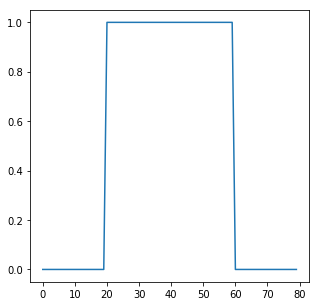

In [38]:
sensor_diamter = 20
sensor_function = np.ones(sensor_diamter) / sensor_diamter

surface = np.repeat([0, 1, 1, 0], 20)
plt.figure(figsize=(5,5))
plt.plot(surface)

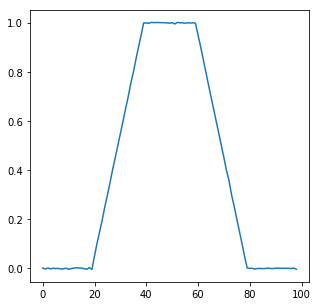

In [39]:
measured_signal = signal.convolve(surface, sensor_function)
noise = np.random.normal(0, 0.002, measured_signal.shape)
measured_signal += noise
plt.figure(figsize=(5,5))
plt.plot(measured_signal)

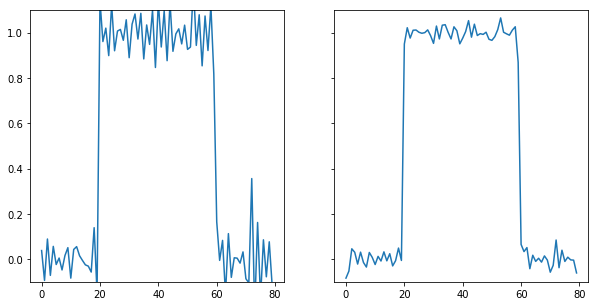

In [49]:
reconstructed_surface = signal.deconvolve(measured_signal, sensor_function)[0]
wiener_reconstruced_surface = wiener(measured_signal, sensor_function, 1, noise*1)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1.plot(reconstructed_surface)
ax1.set_ylim([-0.1, 1.1])
ax2.plot(wiener_reconstruced_surface)